In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Flatten,Dense,Input
from keras import Model
from keras.datasets import fashion_mnist
import keras

In [ ]:
(x_train, y_train), (x_test, y_test)= fashion_mnist.load_data()


4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
import matplotlib.pyplot as plt


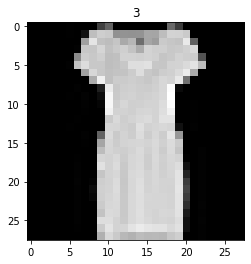

In [ ]:
n=20
plt.title(y_train[n])
plt.imshow(x_train[n],cmap='gray')

In [ ]:
x_train[n]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,  65,  99,   0,   0,
          0,   0,   0,   0,   0, 106,  60,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,  17, 190, 206, 202, 145, 148,
        146, 148, 166, 165, 189, 212, 210, 202,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 160, 229, 193, 189, 197, 169,
        182, 109, 165, 156, 202, 198, 196, 233,  96,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   2, 199, 198, 213, 193, 201, 207,
        196, 172, 211, 206, 207, 200, 202, 208, 217,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 139, 205, 200, 207, 190, 192, 210,
        210, 208, 212, 208, 197, 201, 210, 206, 205,  83,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2, 196, 220, 200, 200, 190, 193, 199,
        222, 222, 225, 199, 198, 210, 212, 218, 227, 189,   0,   0,   0,
          0,   0],
       [  

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [ ]:
x_train[n]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.25490198,
        0.3882353 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.41568628, 0.23529412,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.06666667, 0.74509805, 0.80784315,
        0.7921569 , 0.5686275 , 0.5803922 , 0.57254905, 0.5803922 ,
        0.6509804 , 0.64705884, 0.7411765 , 0.83137256, 0.8235294 ,
        0.7921569 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.627451  , 0.8980392 , 0.75686276,
        0.7411765 , 0.77254903, 0.6627451 , 0.7137255 , 0.42745098,
        0.64705884, 0.6117

# Etiquetas

In [ ]:
import numpy as np
targets_names_index=np.unique(y_train)
targets_names=['T-shirt','Trouser', 'Pullover', 'shirt', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker',' Bag',' Ankle boot' ]
targets_names_index,targets_names

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 ['T-shirt',
  'Trouser',
  'Pullover',
  'shirt',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  ' Bag',
  ' Ankle boot'])

# Modelos

## Fully Connect

In [ ]:
model = Sequential([
          Flatten(input_shape=(28, 28)),
          Dense(100,'relu'),
          Dense(50,'relu'),
          Dense(10, "softmax"),
          ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


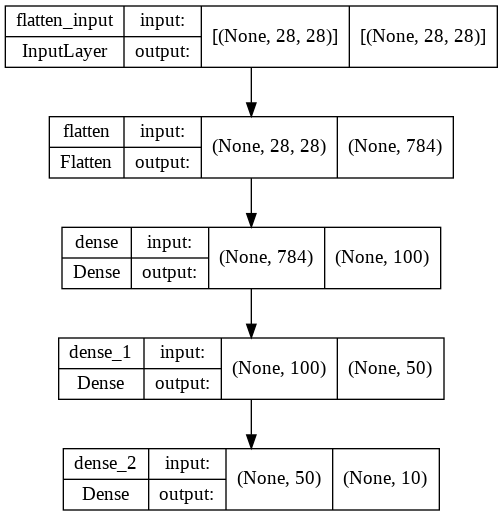

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,batch_size=20,epochs=10,validation_split=0.2)

Epoch 1/10
2400/2400 [==============================] - 10s 4ms/step - loss: 0.5170 - accuracy: 0.8144 - val_loss: 0.4120 - val_accuracy: 0.8508
Epoch 2/10
2400/2400 [==============================] - 9s 4ms/step - loss: 0.3950 - accuracy: 0.8583 - val_loss: 0.4019 - val_accuracy: 0.8533
Epoch 3/10
2400/2400 [==============================] - 9s 4ms/step - loss: 0.3730 - accuracy: 0.8697 - val_loss: 0.3768 - val_accuracy: 0.8687
Epoch 4/10
2400/2400 [==============================] - 10s 4ms/step - loss: 0.3641 - accuracy: 0.8737 - val_loss: 0.4504 - val_accuracy: 0.8689
Epoch 5/10
2400/2400 [==============================] - 10s 4ms/step - loss: 0.3657 - accuracy: 0.8764 - val_loss: 0.4372 - val_accuracy: 0.8644
Epoch 6/10
2400/2400 [==============================] - 11s 4ms/step - loss: 0.3586 - accuracy: 0.8804 - val_loss: 0.4190 - val_accuracy: 0.8721
Epoch 7/10
2400/2400 [==============================] - 9s 4ms/step - loss: 0.3594 - accuracy: 0.8828 - val_loss: 0.4408 - val_accur

In [ ]:
import matplotlib.pyplot as plt
def plot_loss(history, title="Model Loss"):
    """Imprime una gráfica mostrando la pérdida por epoch obtenida en un entrenamiento"""
    ls=np.array(history.history['loss'])
    vl=np.array(history.history['val_loss'])
    plt.plot(ls)
    plt.plot(vl)
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    #plt.show()

def plot_metrics(history, title="Model metrics"):
    """Imprime una gráfica mostrando la pérdida por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    #plt.show()

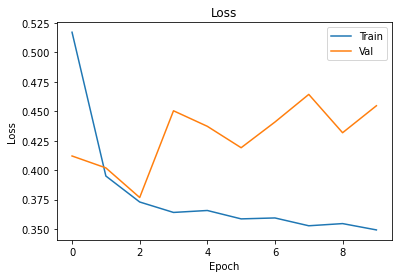

In [ ]:
plot_loss(model.history,"Loss")

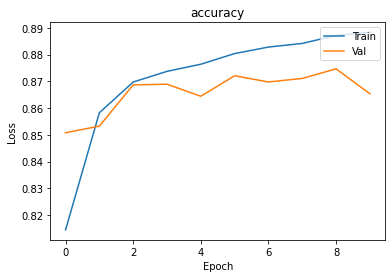

In [ ]:
plot_metrics(model.history,"accuracy")

# Redes Neuronales Convolucionales

In [ ]:
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D, Input

initializer = tf.keras.initializers.GlorotUniform()
def convModel():
  model = keras.Sequential(
      [
          Input(shape=(28,28,1)),
          Conv2D(20, kernel_size=(3, 3), activation="relu", kernel_initializer=initializer),
          MaxPooling2D(pool_size=(2, 2)),
          Conv2D(40, kernel_size=(3, 3), activation="relu",kernel_initializer=initializer),
          MaxPooling2D(pool_size=(2, 2)),
          Flatten(),
          Dense(10, activation="softmax", kernel_initializer=initializer),
      ]
  )
  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
modelconv=convModel()

In [ ]:
modelconv.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 20)        200       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 40)        7240      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 40)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1000)              0         
                                                                 
 dense_3 (Dense)             (None, 10)               

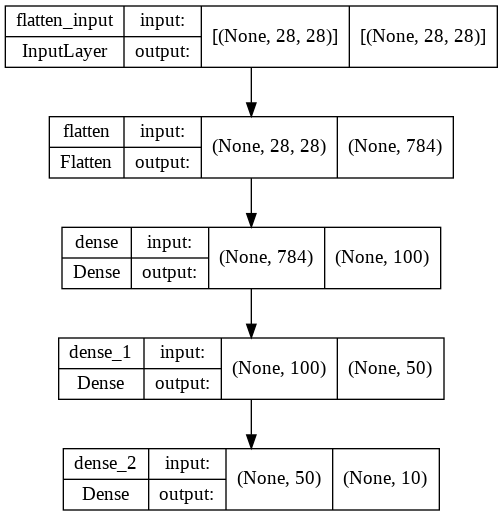

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
modelconv.fit(x_train,y_train,batch_size=20,epochs=10,validation_split=0.2)

Epoch 1/10
2400/2400 [==============================] - 43s 18ms/step - loss: 0.5079 - accuracy: 0.8189 - val_loss: 0.3839 - val_accuracy: 0.8665
Epoch 2/10
2400/2400 [==============================] - 42s 17ms/step - loss: 0.3508 - accuracy: 0.8757 - val_loss: 0.3429 - val_accuracy: 0.8777
Epoch 3/10
2400/2400 [==============================] - 42s 17ms/step - loss: 0.3109 - accuracy: 0.8884 - val_loss: 0.3180 - val_accuracy: 0.8846
Epoch 4/10
2400/2400 [==============================] - 42s 17ms/step - loss: 0.2853 - accuracy: 0.8982 - val_loss: 0.2924 - val_accuracy: 0.8935
Epoch 5/10
2400/2400 [==============================] - 42s 17ms/step - loss: 0.2657 - accuracy: 0.9034 - val_loss: 0.3080 - val_accuracy: 0.8899
Epoch 6/10
2400/2400 [==============================] - 43s 18ms/step - loss: 0.2483 - accuracy: 0.9105 - val_loss: 0.3054 - val_accuracy: 0.8906
Epoch 7/10
2400/2400 [==============================] - 44s 18ms/step - loss: 0.2338 - accuracy: 0.9147 - val_loss: 0.2851 -

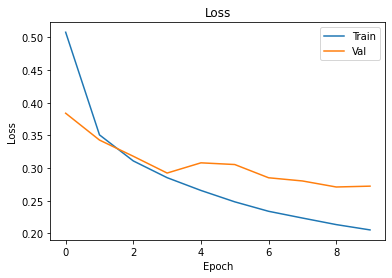

In [ ]:
plot_loss(modelconv.history,"Loss")

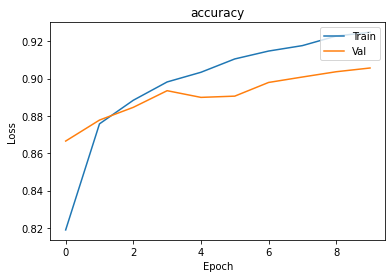

In [ ]:
plot_metrics(modelconv.history,"accuracy")

# Validación de los modelos

In [ ]:
ypm=model.predict(x_test)
ypmc=modelconv.predict(x_test)

In [ ]:
ypm=list(map(np.argmax,ypm))
ypmc=list(map(np.argmax,ypmc))

In [ ]:
from sklearn.metrics import accuracy_score

am=accuracy_score(y_test, ypm, normalize=True)
amc=accuracy_score(y_test, ypmc, normalize=True)

print("Accuracy Fully Connect:",am,"Accuracy Convolucional:",amc)

Accuracy Fully Connect: 0.8552 Accuracy Convolucional: 0.9031


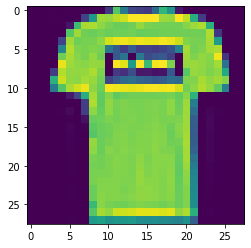

In [ ]:
ni=1
plt.imshow(x_train[ni])

In [ ]:
xt=np.array([x_train[ni]])

pr=modelconv.predict(xt)
pr
np.argmax(pr),targets_names[np.argmax(pr)]

(0, 'T-shirt')

In [ ]:
def predict(img):
  xt=np.array([img])

  pr=modelconv.predict(xt)
  return targets_names[np.argmax(pr)]

In [ ]:
predict(x_train[ni])

'T-shirt'

In [ ]:
import cv2

In [ ]:
img_ts=cv2.imread("/content/drive/MyDrive/UDENAR/Inteligencia Artificial/Redes Neuronales Convolucionales/png-clipart-real-madrid-c-f-la-liga-jersey-kit-football-football-tshirt-white.png",1)

img_p=cv2.imread("/content/drive/MyDrive/UDENAR/Inteligencia Artificial/Redes Neuronales Convolucionales/png-transparent-jeans-revolution-denim-uniqlo-pants-jeans-blue-innovation-woman.png",1)
img_ts.shape,img_p.shape

((800, 900, 3), (843, 920, 3))

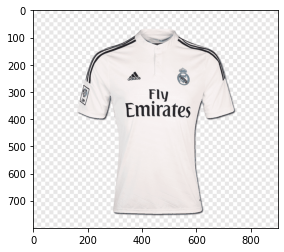

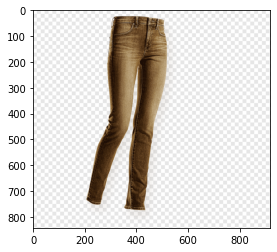

In [ ]:
plt.imshow(img_ts)
plt.show()
plt.imshow(img_p)

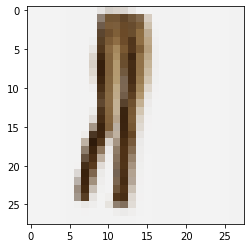

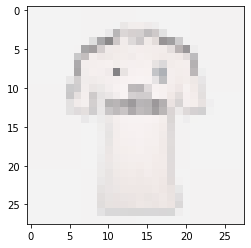

In [ ]:
pant=cv2.resize(img_p,(28,28),interpolation = cv2.INTER_AREA)
tshirt=cv2.resize(img_ts,(28,28),interpolation = cv2.INTER_AREA)

plt.imshow(pant)
plt.show()
plt.imshow(tshirt)
plt.show()

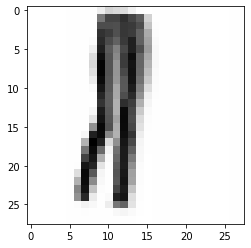

In [ ]:
plt.imshow(pant[:,:,1]/255,cmap='gray')

In [ ]:
predict(pant[:,:,1]/255)

'Sneaker'

In [ ]:
predict(tshirt[:,:,1]/255)

'T-shirt'

In [ ]:
path="/content/drive/MyDrive/UDENAR/Inteligencia Artificial/Redes Neuronales Convolucionales/"
model.save(path+'fully.h5')
modelconv.save(path+'conv.h5')